**Integrantes:** \
Isaí Adriel Macías Cortés 1644680 \
Ana Sofía Saucedo García 1946646 \
Vania Tecillo Pizano \
Gerardo Pulido Landa 1947259\
Leslie Vianney Rodríguez Ascencio 1958161

**Estadística Aplicada** \
Grupo 42



# Parte 1. Serie de Tiempo

Antes de empezar con el análisis de series de tiempo, tenemos que cerciorar que nuestros datos estén correctos, así como importar las librerías y la base de datos que vamos a necesitar.

#### Librerías


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Especializadas

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.seasonal import seasonal_decompose


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# pmdarima

import pmdarima as pm

#### Base de datos

In [2]:
datos_inf = pd.read_excel('base_PIA.xlsx', sheet_name = 'Inflación')

In [3]:
datos_inf.head(12)

,Periodos,Inflación
0,1970/01,5.20
1,1970/02,4.81
2,1970/03,5.01
3,1970/04,4.87
4,1970/05,5.09
5,1970/06,5.35
6,1970/07,5.46
7,1970/08,5.84
8,1970/09,5.11
9,1970/10,4.05


In [4]:
datos_inf.dtypes

Periodos      object
Inflación    float64
dtype: object

Observamos que en el dataframe el tipo de variable es incorrecto para la variable "Periodos", ya que dice que es "object" y debería de ser una variable fecha.

In [5]:
# Convertir en tiempo
# Hacerlo index
# Asignarle frecuencia

datos_inf['Periodos']=pd.to_datetime(datos_inf['Periodos'],format='%Y/%m')
datos_inf=datos_inf.set_index('Periodos')
datos_inf= datos_inf.asfreq('MS')

In [6]:
datos_inf.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01',
               '2023-08-01', '2023-09-01'],
              dtype='datetime64[ns]', name='Periodos', length=645, freq='MS')

In [7]:
# Missing values

datos_inf.isnull().sum()

Inflación    0
dtype: int64

Observamos que no hay missing values en nuestros datos.

In [8]:
# El rango de fechas de nuestra base de datos
fecha_inicio = datos_inf.index.strftime('%Y-%m-%d').min()
fecha_fin = datos_inf.index.strftime('%Y-%m-%d').max()

print("Fecha de inicio:", fecha_inicio)
print("Fecha de fin:", fecha_fin)
print('Rango de fechas:','[',fecha_inicio,'-',fecha_fin,']')

Fecha de inicio: 1970-01-01
Fecha de fin: 2023-09-01
Rango de fechas: [ 1970-01-01 - 2023-09-01 ]


## Introducción

La base de datos contiene la información mensual de la inflación, siendo la inflación el aumento de manera generalizada en el precio de bienes y servicios dentro de la economía de un país durante un periodo de tiempo. Mientras lo que provoca la subida de la inflación cuando la demanda de bienes esta por encima de su producción o importación, por lo que los precios aumentan.  

In [9]:
datos_inf

,Inflación
Periodos,
1970-01-01,5.20
1970-02-01,4.81
1970-03-01,5.01
1970-04-01,4.87
1970-05-01,5.09
...,...
2023-05-01,5.84
2023-06-01,5.06
2023-07-01,4.79


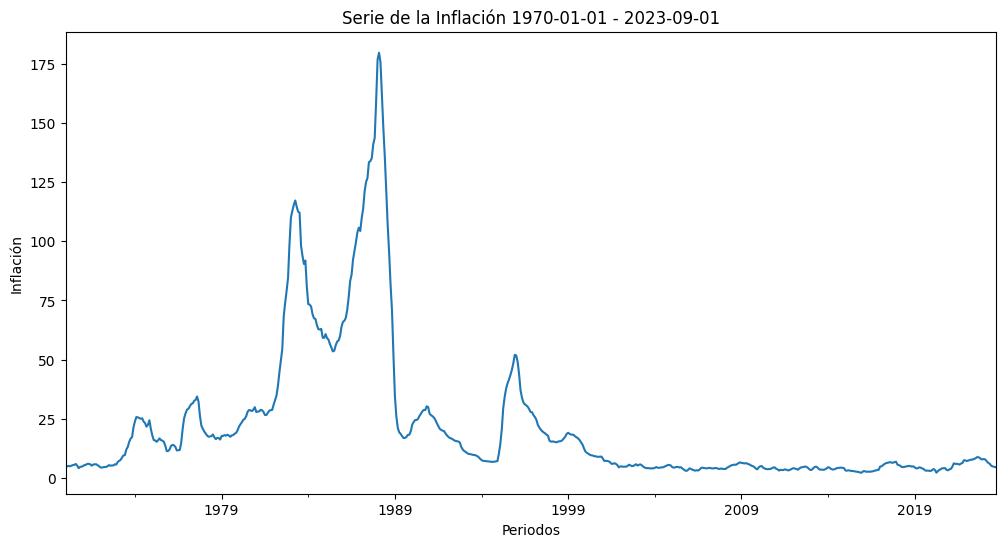

In [10]:
datos_inf['Inflación'].plot(figsize=(12,6))
plt.xlabel('Periodos')
plt.ylabel('Inflación')
plt.title(f'Serie de la Inflación {fecha_inicio} - {fecha_fin}');


Observamos con la gráfica que nuestra serie parece no tener tendencia, y que a partir del año 2000 la inflación no ha tenido un sesgo muy grande como ocurrió en los años de 1982-1988 donde el valor de la inflación se disparó de una manera incomprensible.

## Estacionalidad en la serie (observando la gráfica)

2. Comenta acerca de si se observa cierta estacionalidad en la serie, en que meses aumenta la variable ¿por qué?, en qué meses disminuye la variable ¿por qué? ¿hay efecto estacional?

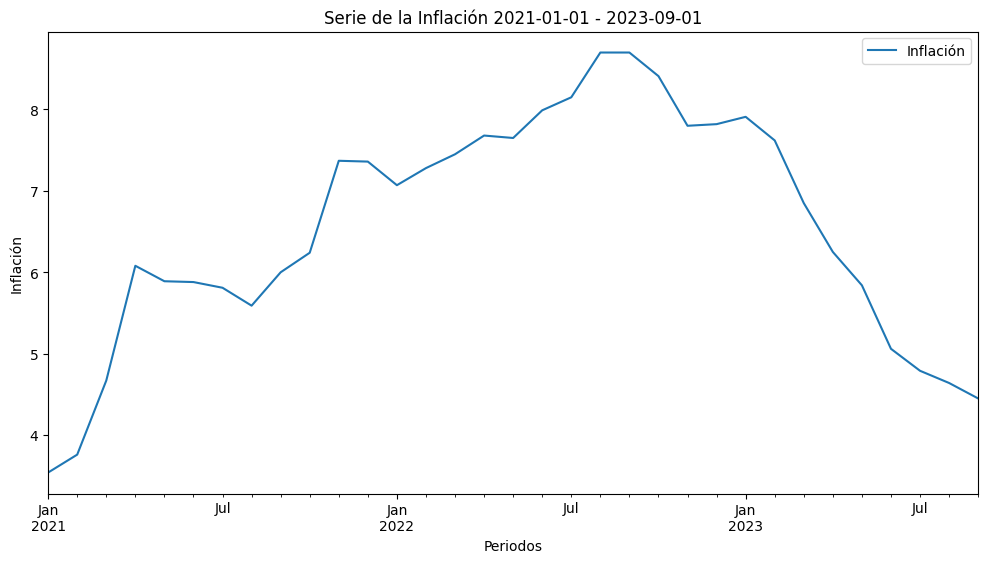

In [11]:
datos_inf['Inflación']['2021-01-01':'2023-09-01'].plot(figsize=(12,6))
plt.title(f'Serie de la Inflación 2021-01-01 - {fecha_fin}')
plt.ylabel('Inflación')
plt.legend()
plt.show()

No se observa cierta estacionalidad en la serie, ya que como se observa en los últimos años no se presenta que en el mismo mes aumente o disminuya la inflación.

## Importancia del pronóstico de la serie de tiempo

Uno de los propósitos fundamentales del análisis de series de tiempo es el pronóstico, es decir, “anticipar valores futuros de la variable”. Comenta para quién es importante conocer el pronóstico de la serie de tiempo que analizaras y por qué es importante conocer el pronóstico de dicha serie de tiempo.

Saber el pronóstico de la serie de tiempo de la inflación es importante para las personas encargadas de la economía del país y de la sociedad o mejor dicho es importante para la economía de los países porque, en un entorno de inflación baja y estable, todos los recursos producidos se asignan de una manera más eficiente, lo que garantiza un mayor crecimiento y bienestar para la población en general y si hay inflación en una economía, es muy difícil distribuir nuestros ingresos, planear un viaje, pagar nuestras deudas o invertir en algo rentable, ya que los precios, que eran una referencia para asignar nuestro dinero de la mejor manera posible, están distorsionados.

Cuando se presenta, nos damos cuenta que la cantidad de dinero que veníamos administrando tiempo atrás, ya no nos alcanza para comprar lo mismo que antes y esto nos afecta a todos: amas de casa, empleados, productores, ahorradores, inversionistas, empresarios, etc. 

## Estadísticas descriptivas de la serie de tiempo

In [12]:
estadisticas=datos_inf.describe()

In [16]:
estadisticas.to_excel("Estadistica.xlsx")

Tenemos que contamos con 645 datos de la inflación mensual y que el promedio es de 21.65 sin embargo los datos tienen una desviación estandar de 30.42 , ya que el maximo observado fue de 179.73 y el minimo de 2.13


## Promedio móvil centrado a 11 meses

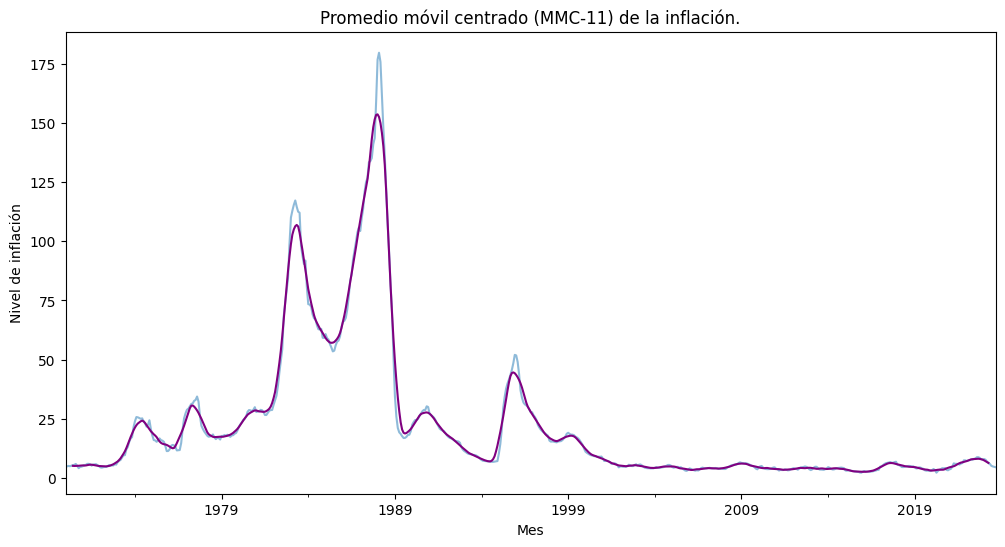

In [16]:
# Se aplica promedio móvil centrado 
datos_inf['PMC-11'] = datos_inf['Inflación'].rolling(11,center=True).mean()

datos_inf['Inflación'].plot(alpha=0.5,figsize=(12,6))
datos_inf['PMC-11'].plot(color='purple')
plt.title('Promedio móvil centrado (MMC-11) de la inflación.')
plt.xlabel('Mes')
plt.ylabel('Nivel de inflación');

## Componente estacional

In [17]:
ETS1 = seasonal_decompose(datos_inf['Inflación'],model='mult')

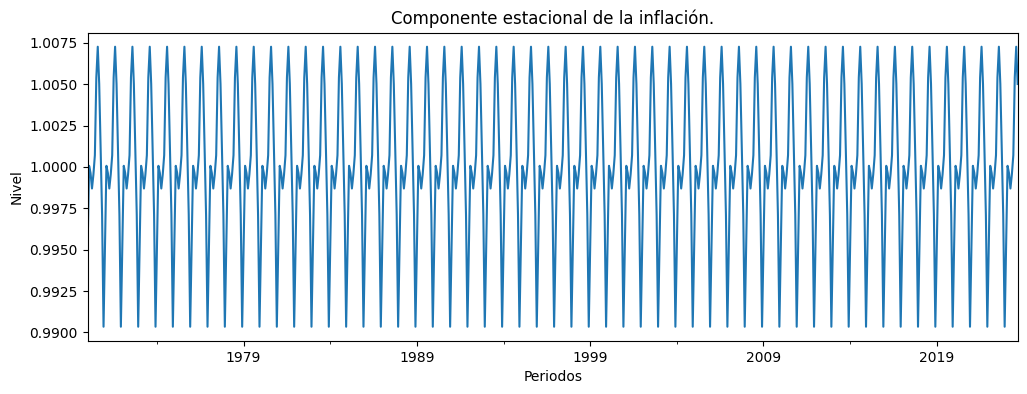

In [18]:
# Componente estacional
ETS1.seasonal.plot(figsize=(12,4))
plt.title('Componente estacional de la inflación.')
plt.xlabel('Periodos')
plt.ylabel('Nivel');

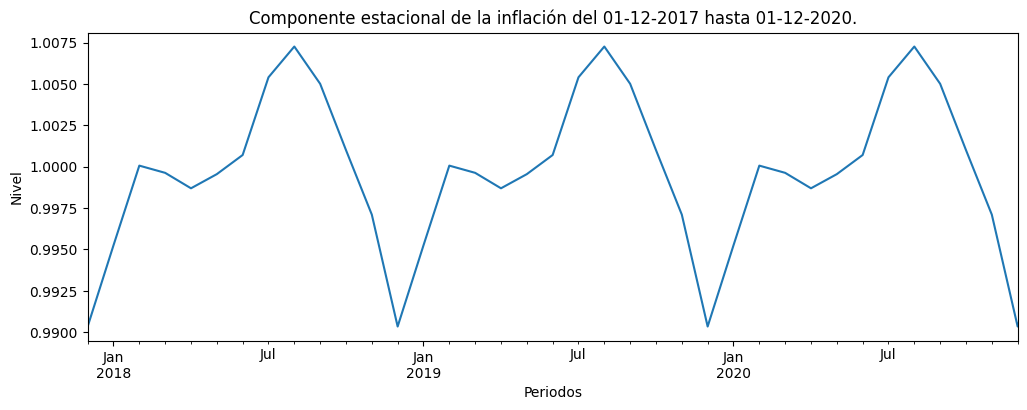

In [19]:
ETS1.seasonal.plot(figsize=(12,4))
plt.title('Componente estacional de la inflación del 01-12-2017 hasta 01-12-2020.')
plt.xlim('2017-12-01','2020-12-01')
plt.xlabel('Periodos')
plt.ylabel('Nivel');

En esta observación más detallada del componente estacional de la serie de inflación, se aprecia que el mes de agosto presenta el nivel más alto de inflación durante el año, en contraste con diciembre, que muestra el nivel más bajo.

In [20]:
ETS1.seasonal.head(24)


Periodos
1970-01-01    0.995244
1970-02-01    1.000063
1970-03-01    0.999627
1970-04-01    0.998693
1970-05-01    0.999549
1970-06-01    1.000705
1970-07-01    1.005403
1970-08-01    1.007264
1970-09-01    1.005010
1970-10-01    1.001003
1970-11-01    0.997101
1970-12-01    0.990337
1971-01-01    0.995244
1971-02-01    1.000063
1971-03-01    0.999627
1971-04-01    0.998693
1971-05-01    0.999549
1971-06-01    1.000705
1971-07-01    1.005403
1971-08-01    1.007264
1971-09-01    1.005010
1971-10-01    1.001003
1971-11-01    0.997101
1971-12-01    0.990337
Freq: MS, Name: seasonal, dtype: float64

## Serie desestacionalizada

In [21]:
datos_inf['Desestacionalizada'] = datos_inf['Inflación']/ETS1.seasonal

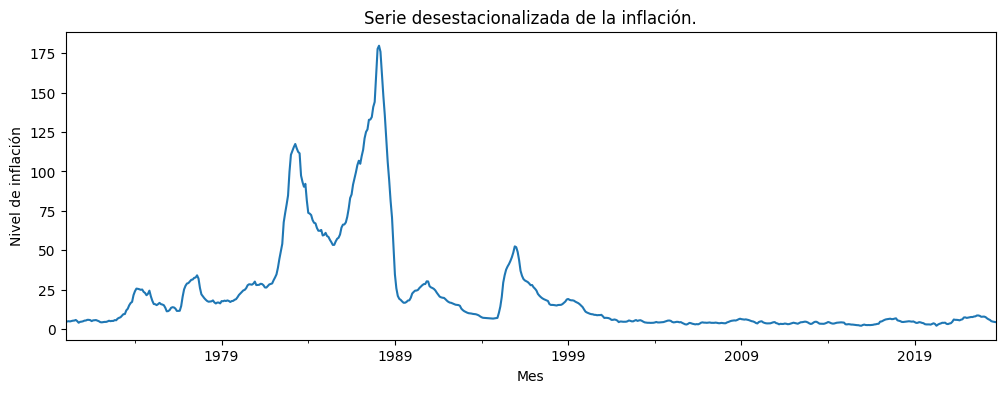

In [22]:
datos_inf['Desestacionalizada'].plot(figsize=(12,4))
plt.title('Serie desestacionalizada de la inflación.')
plt.xlabel('Mes')
plt.ylabel('Nivel de inflación');

# Prueba de dickey-fuller aumentada (prueba de raíz unitaria)

In [23]:
# H0: Serie no estacionaria.
# H1: Serie estacionaria.
# P-valor < alfa, rechazamos H0.
prueba_DFA1 = adfuller(datos_inf['Inflación'])
pvalue1 = prueba_DFA1[1]
pvalue1.round(3)

0.045

El p-valor es $0.04$, por lo que, rechazamos H0, la inflación una serie estacionaria.
* Inflación = Integrado $I(0)$ = $ARIMA(p,0,q)$

# Gráficas de autocorrelación (ACF) y autocorrelación parcial (PACF)

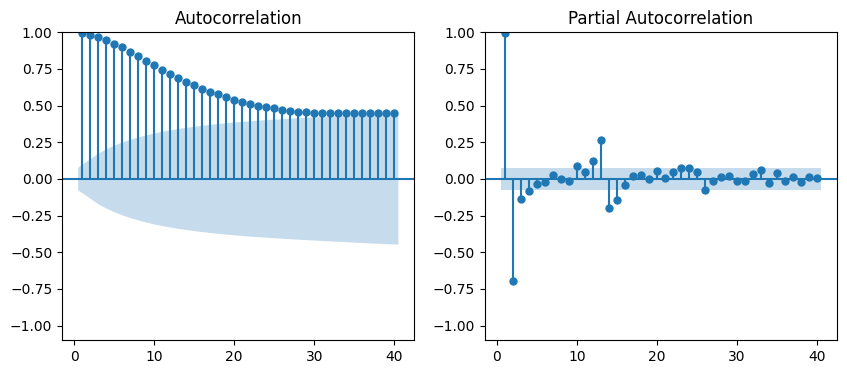

In [95]:
ig,ax=plt.subplots(1,2,figsize=(10,4))

#ACF
plot_acf(datos_inf['Inflación'].dropna(),zero=False,lags=40,ax=ax[0])
ax[0].set_ylim(-1.1)

#PACF
plot_pacf(datos_inf['Inflación'].dropna(),zero=False,lags=40,ax=ax[1])
ax[1].set_ylim(-1.1)
plt.show()

# auto_arima con el criterio AIC

In [31]:
pm.auto_arima(datos_inf['Inflación'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              ic='aic',
              seasonal= True,
              start_P=1,
              start_Q=1,
              max_P=7,
              max_Q=7,)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 3, 12),
      suppress_warnings=True, with_intercept=False)

# auto_arima con el criterio BIC

In [32]:
pm.auto_arima(datos_inf['Inflación'],
              start_p=1,
              start_q=1,
              m=12,
              max_p=7,
              max_q=7,
              ic='bic',
              seasonal= True,
              start_P=1,
              start_Q=1,
              max_P=7,
              max_Q=7,)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 0, 3, 12),
      suppress_warnings=True, with_intercept=False)

# Modelo ARIMA

In [33]:
model = ARIMA(datos_inf['Inflación'], order=(1,1,0), seasonal_order=(1,0,3,12))
results = model.fit()
print(results.summary())

                                        SARIMAX Results                                         
Dep. Variable:                                Inflación   No. Observations:                  645
Model:             ARIMA(1, 1, 0)x(1, 0, [1, 2, 3], 12)   Log Likelihood               -1138.474
Date:                                  Wed, 08 Nov 2023   AIC                           2288.949
Time:                                          13:36:45   BIC                           2315.755
Sample:                                      01-01-1970   HQIC                          2299.351
                                           - 09-01-2023                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8410      0.009     90.840      0.000       0.823

# Pronóstico para 1, 2 ,3 ,4 y 5 periodos

In [74]:
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [80]:
inicio = '2023-10-01'
fin = '2024-02-01'

In [81]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [82]:
pronostico = pd.DataFrame({
    'pronóstico': pronostico_valor,
    'limite inferior': pronostico_intervalos.iloc[:,0],
    'limite superior': pronostico_intervalos.iloc[:,1]
})

In [83]:
pronostico

,pronóstico,limite inferior,limite superior
2023-10-01,4.506693,1.749955,7.263430
2023-11-01,4.566456,-1.209013,10.341924
2023-12-01,4.596509,-4.497613,13.690631
2024-01-01,4.545107,-8.015711,17.105926
2024-02-01,4.533914,-11.548395,20.616222


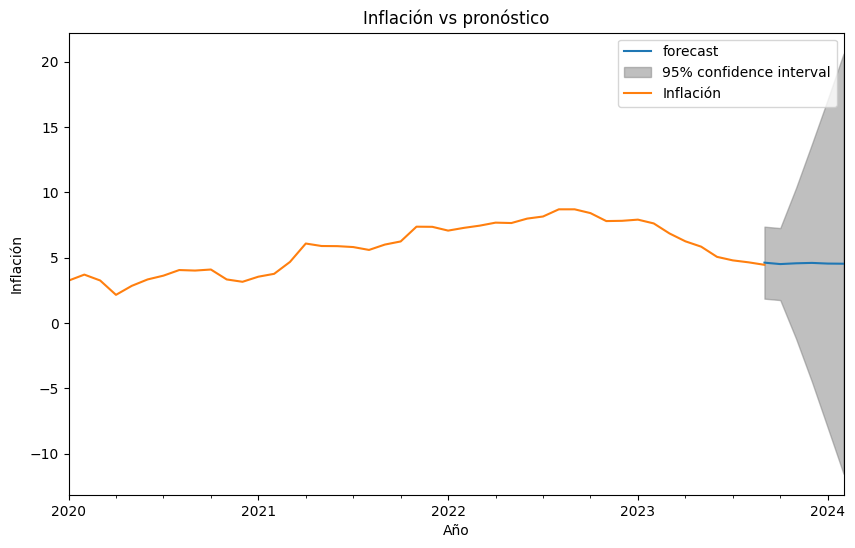

In [100]:
## grafica del pronostico
serie_original = datos_inf['2020-01-01':]
plot_predict(results, '2023-09-01', '2024-02-01')
serie_original['Inflación'].plot(figsize=(10,6));
plt.title('Inflación vs pronóstico')
plt.xlabel('Año')
plt.ylabel('Inflación')
plt.legend()
plt.show()